# Introduction to NLP Fundamentals in TensorFlow

NLP has the goal of deriving information out of natural language (could be sequences text or speech)

Another common term for NLP problems is sequence to sequence problems (seq2seq)

## Check for GPU 

In [ ]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Get helper functions 


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-08-09 12:02:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-09 12:02:26 (84.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

  ## Get a text dataset

  The dataset we're going to be uusing is Kaggle's introduction to NLP dataset (text samples of Tweets labelled as diaster or not diaster)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data("nlp_getting_started.zip")

--2022-08-09 12:02:33--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.128, 142.250.97.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.02s   

2022-08-09 12:02:34 (38.3 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing our text dataset

To visualize our text samples, we first have to read them in, one way to do so would be to use python. 

But if you want to visualize straight away you can use pandas.

However, you might not always be able to do this based on allowed memory. 

In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
 test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac = 1, random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# How many examples of each class are there?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# How many samples ? 
print(f"Numple of train samples: {len(train_df)}  \nNumber of test samples: {len(test_df)}")

Numple of train samples: 7613  
Number of test samples: 3263


In [ ]:
# Let's visualize random data 
import random


random_index = random.randint(0, len(train_df)-5)  # create random indexes not higher than total length of train_df
for row in train_df_shuffled[['text', 'target']][random_index : random_index+5].itertuples():
  _, text, target = row
  print(f"Target : {target} \n""(real disaster)" if target == 1 else "(not real disaster)")
  print(f"Text:\n {text} \n")

Target : 1 
(real disaster)
Text:
 Rly tragedy in MP: Some live to recount horror: ÛÏWhen I saw coaches of my train plunging into water I called ... http://t.co/72ix7vM87w 

(not real disaster)
Text:
 @ariabrisard @leiaorganasolo Good. Play along with her. You may begin your operation with the death star. The evacuation is nearly complete. 

(not real disaster)
Text:
 @AGeekyFangirl14 's things she looks in a significant other:
1. Beautiful eyes.
2. Humor.
3. Farts that creates an earthquake.

???????? 

Target : 1 
(real disaster)
Text:
 The Ashes Test match is currently more interesting than stupid Congress rioting... 

(not real disaster)
Text:
 MEN CRUSH EVERY FUCKING DAY???????????????????????????? http://t.co/Fs4y1c9mNf 



### Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size = 0.2,
                                                                            random_state = 42)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6090, 6090, 1523, 1523)

In [ ]:
# Check the first 10 samples 
train_sentences[:10], train_labels[:10]

(array(['Detonation fashionable mountaineering electronic watch water-resistant couples leisure tab\x89Û_ http://t.co/E61x9Y65QD http://t.co/OVLET0gDqm',
        "Men escape car engulfed in flames in Parley's Canyon crews investigating cause - http://t.co/tFan6qq2Ys http://t.co/rAkwWritPo",
        'I-77 Mile Marker 31 to 40 South Mooresville  Iredell Vehicle Accident Congestion at 8/6 1:18 PM',
        "#Greece's tax revenues collapse as debt crisis continues via @guardian #bailout http://t.co/cJvbQXw83s ^mp",
        'Be not afraid of sudden fear neither of the desolation of the wicked when it cometh. For the Lord shall be thy... http://t.co/bP597YDs2b',
        'Storm batters Auckland and Northland: A violent overnight storm has battered Auckland and Northland uprooting... http://t.co/enrPGRgtTs',
        "Benzema increasingly looks to be a casualty of Benitez's new look squad. Arsenal bound? 50-50 chance I think",
        'Acquire your postexistence straight a elevation in addition

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers. 

There are a few ways to this:
* Tokenization - direct mapping of token (a token couuld be a word or a character) to a number
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned) 

### Text vectorization (tokenization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens = None, # how many words in the vocabulary 
                                    standardize = "lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams = None, #create a group of n-words?,
                                    output_mode = "int", # how to map tokens to numbers,
                                    output_sequence_length = None, #how long do youu want your sequences to be
                                    pad_to_max_tokens = False) 

In [ ]:
# Find the average nuumber of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/ len(train_sentences))


15

In [ ]:
# setup text vectorization variables 
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequence will be (e.g. how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length = max_length)

In [ ]:
# Fit the text vectorizer to the training data
text_vectorizer.adapt(train_sentences)

In [ ]:
# create a sample sentence and tokenize it 
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[240,   3, 229,   4,  13, 724,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it 
random_sentence = random.choice(train_sentences)
print(f"Original text : {random_sentence} \
      \n \n Vectorized Version:" )
text_vectorizer([random_sentence])

Original text : @DaughterofNai Tenshi activated Yuki's fire card!       
 
 Vectorized Version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1, 7095, 2377, 6020,   44, 2340,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
# Get the unique words in the vocabulary 
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in the training data
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]

print(f"Top 5 words: {top_5_words}")
print(f"Bottom 5 words: {bottom_5_words}")

Top 5 words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 words: ['minded', 'mindblowing', 'milne', 'milledgeville', 'millcityio']


  ### Creating an Embedding using an Embedding Layer

  To make our embedding, we're going to use TensorFlow's embedding layer

  The parameters we care most aboutu for our embedding layer:
  * `input_dim` = the size of our vocabulary 
  * `output_dim` = the size of the output  embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
  * `input_length` = length of the sequences being passed to the embedding layer 
  

In [ ]:
from tensorflow.keras import layers 

embedding = layers.Embedding(input_dim = max_vocab_length,# set input shape
                             output_dim =128, # set output shape
                             input_length = max_length)

In [ ]:
# Get random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original sentence: {random_sentence} \n \
        Embedded sentence:")

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original sentence: Please sign &amp; RT to save #SaltRiverWildHorses http://t.co/IKUAYUSEqt http://t.co/BQBHUyfmE9 
         Embedded sentence:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.03735107, -0.02394055, -0.03175322, ..., -0.00515379,
         -0.03834907, -0.03692553],
        [-0.02699258, -0.02875584, -0.04091933, ..., -0.03964907,
         -0.02226232, -0.00327377],
        [-0.04730146, -0.04371298,  0.04155375, ..., -0.04225188,
         -0.02508175,  0.02292811],
        ...,
        [ 0.00244856,  0.04694254,  0.02359756, ..., -0.00956547,
          0.03617345,  0.04271773],
        [ 0.00244856,  0.04694254,  0.02359756, ..., -0.00956547,
          0.03617345,  0.04271773],
        [ 0.00244856,  0.04694254,  0.02359756, ..., -0.00956547,
          0.03617345,  0.04271773]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding 
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.03735107, -0.02394055, -0.03175322,  0.02557149, -0.04750184,
        -0.03976462, -0.00252737, -0.00630556, -0.00941085, -0.01585357,
         0.00346407,  0.0279622 , -0.00702596, -0.03009298,  0.03654778,
        -0.038916  ,  0.00817374, -0.04654081,  0.00898518, -0.03285174,
         0.02551392,  0.03905864, -0.0352958 ,  0.03720881,  0.03924162,
         0.02279129,  0.0468182 ,  0.0376886 , -0.04494856,  0.02149344,
         0.04194226, -0.04953293,  0.01949764,  0.04562025,  0.01861472,
         0.04172996,  0.04800559, -0.0192968 , -0.04447586, -0.00799342,
         0.02851814, -0.0181119 ,  0.01174895, -0.02993782,  0.01995993,
        -0.00435054, -0.04046196, -0.0188602 , -0.03593819,  0.04709962,
        -0.0130543 , -0.00035086,  0.02750773,  0.00954381, -0.03219348,
         0.04384402,  0.02561886, -0.02660379, -0.00791211, -0.03858856,
        -0.02251926, -0.02694835, -0.02376329,  0.04576726, -0.0090626 ,
  

## Modeling a text dataset (running a series of experiments)

Now that we've got a way to turn our text sequences into numbers, it's time to start building a series of modelling experiments.

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-Forward Neural Network (dense model)
* Model 2: Long Short Term Memory (LSTM) Recurrent NN (RNN)
* Model 3: GRU (RNN)
* Model 4: Bidirectional-LSTM (RNN)
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: TensorFlow Hub Pretrained Feature Extractor (10% of data)

We will approach these using the standard steps in modelling with TensorFlow:
* Create a model
* Build a model
* Fit a model
* Evaluate our model 


### Model 0: Getting a baseline

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon

To create our baseline, we will use Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words to numbers.

Note: It's common practive to use non Deep learning algorithms as a baseline because of their speed and then later using DL to see if you can improve upon them.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # Converts words to numbers using tfidf
    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data 
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate the baseline model 
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Baseline accuracy: {baseline_score:0.2f}")

Baseline accuracy: 0.80


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments 

We could evaluate our models' predictions with different metrics everytime, however, this will be cumbersome and could be easily fixed with a function. 

Let's create one to compare our model's predictions with the truth labels using the following:
* Accuracy 
* Precision 
* Recall
* F1-score

In [ ]:
# Function to evaluate models 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and F1-score of a binary classification model
  """

  # Calculate the model accuracy 
  model_accuracy = accuracy_score(y_true, y_pred) 
  # Calculate model precision, recall, f1-score
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average = 'weighted')
  model_results = {'accuracy': round(model_accuracy,3),
                   'preccision': round(model_precision,3), 
                   'recall': round(model_recall,3),
                   'f1': round(model_f1,3)}

  return model_results

In [ ]:
baseline_results = calculate_results(val_labels, baseline_preds)
baseline_results

{'accuracy': 0.799, 'f1': 0.792, 'preccision': 0.815, 'recall': 0.799}

### Model 1: A simple dense model

In [ ]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Craeet a directory to save logs
SAVE_DIR = 'model_logs'


In [ ]:
# Build model with the Functional API 
from tensorflow.keras import layers

inputs = layers.Input(shape =(1,), dtype ="string") # our inputs are 1D strings
x = text_vectorizer(inputs) # turn input text into numbers
x = embedding(x) # create an emedding of numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation = "sigmoid")(x) # create the output layer, we want binary output so use sigmoid
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile the model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20220809-120238
Epoch 1/5
191/191 [==============================] - 8s 35ms/step - loss: 0.6189 - accuracy: 0.6869 - val_loss: 0.5459 - val_accuracy: 0.7511
Epoch 2/5
191/191 [==============================] - 5s 27ms/step - loss: 0.4520 - accuracy: 0.8154 - val_loss: 0.4767 - val_accuracy: 0.7886
Epoch 3/5
191/191 [==============================] - 5s 26ms/step - loss: 0.3515 - accuracy: 0.8617 - val_loss: 0.4610 - val_accuracy: 0.7859
Epoch 4/5
191/191 [==============================] - 5s 26ms/step - loss: 0.2857 - accuracy: 0.8893 - val_loss: 0.4614 - val_accuracy: 0.7932
Epoch 5/5
191/191 [==============================] - 5s 28ms/step - loss: 0.2358 - accuracy: 0.9136 - val_loss: 0.4784 - val_accuracy: 0.7925


In [ ]:
# Check results
model_1.evaluate(val_sentences, val_labels)

48/48 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.7925


[0.47837767004966736, 0.7925148010253906]

In [ ]:
# Make predictions 
model_1_pred_prob = model_1.predict(val_sentences)
model_1_pred_prob

array([[0.40248555],
       [0.88157356],
       [0.9968751 ],
       ...,
       [0.3071373 ],
       [0.9695259 ],
       [0.9943376 ]], dtype=float32)

In [ ]:
# Conver model prediction probabilities to label format 
model_1_preds = tf.squeeze(tf.round(model_1_pred_prob))
model_1_preds

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 1., 1., ..., 0., 1., 1.], dtype=float32)>

In [ ]:
model_1_results = calculate_results(val_labels, model_1_preds)
model_1_results

{'accuracy': 0.793, 'f1': 0.789, 'preccision': 0.796, 'recall': 0.793}

In [ ]:
print(f"Baseline Results: {baseline_results} \nModel 1 Results: { model_1_results}")

Baseline Results: {'accuracy': 0.799, 'preccision': 0.815, 'recall': 0.799, 'f1': 0.792} 
Model 1 Results: {'accuracy': 0.793, 'preccision': 0.796, 'recall': 0.793, 'f1': 0.789}


In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer 
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Model 1 summary 
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of embedding layer 
# (these are the numerical representations of each token in ouru training data which have been learned for 5 epochs)
embeded_weights = model_1.get_layer("embedding").get_weights()
embeded_weights

[array([[-0.01205368,  0.06299283,  0.02640241, ...,  0.00635257,
          0.05101831,  0.05750945],
        [ 0.03812374,  0.02383938, -0.02067589, ...,  0.02122135,
         -0.03508817,  0.04752416],
        [-0.03721835,  0.0297775 ,  0.02789652, ...,  0.02628879,
         -0.01581929,  0.0124019 ],
        ...,
        [-0.07022446,  0.00585408,  0.0556867 , ...,  0.03244134,
          0.01289301,  0.03274126],
        [ 0.00233305,  0.00585147, -0.03457284, ..., -0.06950872,
         -0.03140591, -0.05921159],
        [ 0.06831303, -0.01657748, -0.09752829, ..., -0.0531408 ,
         -0.03376731, -0.09450217]], dtype=float32)]

In [ ]:
embeded_weights = model_1.get_layer("embedding").get_weights()[0]
embeded_weights.shape

(10000, 128)

Now we've got the embedding matrix our model has learned to represent our tokens, let's ee how we can visualize it. 

To do so, TensorFlow has handy tool called projector 

And TensorFlow also has an incredible guide on word embeddings itself : https://www.tensorflow.org/text/guide/word_embeddings


In [ ]:
# Create embedding files (we got this from the TensorFlow word embedding guide)
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embeded_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download files from Colab to upload to projector 
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Network (RNN's)

RNN's are useful for sequence data

The premise of a recuurrent neural network is to use the representation of a previous input to aid the representation of a later input.

### Model 2: LSTM 

LSTM = long short term memory (one of the most popular LSTM cells)

Our stucture of an RNN typically looks like this: 

```
input (text) -> tokenize -> embed -> layers (RNN/dense) -> output (label probability)
```

In [ ]:
# Create an LSTM model 
from tensorflow.keras import layers
inputs = layers.Input(shape = (1, ), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences= True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name = 'model_2_LSTM')


When your stacking RNN cells together, you need to return_sequences=True

In [ ]:
# Get a summary 
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [ ]:
# Compile the model
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model 
model_2_history = model_2.fit(train_sentences,
                              train_labels, 
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = create_tensorboard_callback(SAVE_DIR,
                                                                      "model_2_LSTM"))

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220809-120309
Epoch 1/5
191/191 [==============================] - 13s 45ms/step - loss: 0.2176 - accuracy: 0.9273 - val_loss: 0.5514 - val_accuracy: 0.7741
Epoch 2/5
191/191 [==============================] - 8s 40ms/step - loss: 0.1458 - accuracy: 0.9466 - val_loss: 0.6480 - val_accuracy: 0.7768
Epoch 3/5
191/191 [==============================] - 8s 40ms/step - loss: 0.1151 - accuracy: 0.9542 - val_loss: 0.7327 - val_accuracy: 0.7873
Epoch 4/5
191/191 [==============================] - 8s 40ms/step - loss: 0.0953 - accuracy: 0.9631 - val_loss: 0.8043 - val_accuracy: 0.7859
Epoch 5/5
191/191 [==============================] - 8s 40ms/step - loss: 0.0756 - accuracy: 0.9688 - val_loss: 1.2084 - val_accuracy: 0.7702


In [ ]:
# Make predictions with LSTM Model 
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs

array([[0.02108347],
       [0.05152407],
       [0.9999971 ],
       ...,
       [0.99925613],
       [0.99999917],
       [0.99999726]], dtype=float32)

In [ ]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
val_labels

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
# Calculate model 2 results
model_2_results = calculate_results(y_true= val_labels,
                                    y_pred = model_2_preds)
model_2_results

{'accuracy': 0.77, 'f1': 0.768, 'preccision': 0.77, 'recall': 0.77}

In [ ]:
print(f"Baseline Results: {baseline_results} \nModel 2 Results: { model_2_results}")

Baseline Results: {'accuracy': 0.799, 'preccision': 0.815, 'recall': 0.799, 'f1': 0.792} 
Model 2 Results: {'accuracy': 0.77, 'preccision': 0.77, 'recall': 0.77, 'f1': 0.768}


### Model 3: GRU 

Another popular and effective RNN component is the GRU or Gated recurrent unit. 

The GRU cell has similar features to the LSTM model but with less parameters

In [ ]:
# Create an GRU model 
from tensorflow.keras import layers
inputs = layers.Input(shape = (1, ), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences= True)(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name = 'model_3_GRU')

In [ ]:
# Get a summary 
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 lstm_2 (LSTM)               (None, 15, 64)            33024     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                       

In [ ]:
# Compile the model
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model 
model_3_history = model_3.fit(train_sentences,
                              train_labels, 
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = create_tensorboard_callback(SAVE_DIR,
                                                                      "model_3_GRU"))

Saving TensorBoard log files to: model_logs/model_3_GRU/20220809-120356
Epoch 1/5
191/191 [==============================] - 17s 55ms/step - loss: 0.1327 - accuracy: 0.9583 - val_loss: 0.6884 - val_accuracy: 0.7761
Epoch 2/5
191/191 [==============================] - 9s 47ms/step - loss: 0.0679 - accuracy: 0.9721 - val_loss: 1.0424 - val_accuracy: 0.7715
Epoch 3/5
191/191 [==============================] - 11s 60ms/step - loss: 0.0542 - accuracy: 0.9777 - val_loss: 1.3169 - val_accuracy: 0.7630
Epoch 4/5
191/191 [==============================] - 15s 79ms/step - loss: 0.0496 - accuracy: 0.9783 - val_loss: 1.2553 - val_accuracy: 0.7557
Epoch 5/5
191/191 [==============================] - 9s 46ms/step - loss: 0.0492 - accuracy: 0.9780 - val_loss: 1.1584 - val_accuracy: 0.7669


In [ ]:
# Make predictions with GRU Model 
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs

array([[0.7321243 ],
       [0.61051154],
       [0.9999285 ],
       ...,
       [0.99979496],
       [0.9999476 ],
       [0.9998244 ]], dtype=float32)

In [ ]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model 3 results
model_3_results = calculate_results(y_true= val_labels,
                                    y_pred = model_3_preds)
model_3_results

{'accuracy': 0.767, 'f1': 0.766, 'preccision': 0.766, 'recall': 0.767}

In [ ]:
print(f"Baseline Results: {baseline_results} \nModel 3 Results: { model_3_results}")

Baseline Results: {'accuracy': 0.799, 'preccision': 0.815, 'recall': 0.799, 'f1': 0.792} 
Model 3 Results: {'accuracy': 0.767, 'preccision': 0.766, 'recall': 0.767, 'f1': 0.766}


### Model 4: Bidirectional RNN

Normal RNN's go from left to right (just like you'd read an English sentence) 

Bidirectional RNN's goes from rigth to left as well as left to right

In [ ]:
# Build a bidirectional rnn 
from tensorflow.keras import layers 
inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name = 'model_4_bidirectional')

In [ ]:
# Compile the model
model_4.compile(loss ='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
# Fit the model 
model_4_history = model_4.fit(train_sentences,
                              train_labels, 
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = create_tensorboard_callback(SAVE_DIR,
                                                                      "model_4_bidirectional"))

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20220809-120500
Epoch 1/5
191/191 [==============================] - 20s 68ms/step - loss: 0.1022 - accuracy: 0.9690 - val_loss: 0.9370 - val_accuracy: 0.7715
Epoch 2/5
191/191 [==============================] - 11s 57ms/step - loss: 0.0513 - accuracy: 0.9762 - val_loss: 1.0761 - val_accuracy: 0.7643
Epoch 3/5
191/191 [==============================] - 11s 59ms/step - loss: 0.0431 - accuracy: 0.9796 - val_loss: 1.3098 - val_accuracy: 0.7702
Epoch 4/5
191/191 [==============================] - 12s 64ms/step - loss: 0.0383 - accuracy: 0.9803 - val_loss: 1.2002 - val_accuracy: 0.7590
Epoch 5/5
191/191 [==============================] - 11s 58ms/step - loss: 0.0366 - accuracy: 0.9811 - val_loss: 1.4589 - val_accuracy: 0.7728


In [ ]:
# Make predictions with GRU Model 
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs

array([[0.14217761],
       [0.53853106],
       [0.9999831 ],
       ...,
       [0.99988854],
       [0.9999924 ],
       [0.9999923 ]], dtype=float32)

In [ ]:
# Convert model 4 pred probs to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 4 results
model_4_results = calculate_results(y_true= val_labels,
                                    y_pred = model_4_preds)
model_4_results

{'accuracy': 0.773, 'f1': 0.771, 'preccision': 0.773, 'recall': 0.773}

In [ ]:
print(f"Baseline Results: {baseline_results} \nModel 4 Results: { model_4_results}")

Baseline Results: {'accuracy': 0.799, 'preccision': 0.815, 'recall': 0.799, 'f1': 0.792} 
Model 4 Results: {'accuracy': 0.773, 'preccision': 0.773, 'recall': 0.773, 'f1': 0.771}


## Convolutional Neural Networks for Text (and other types of sequences)

We've used CNNs for images but images are typically 2D ( height x width) however, our text data is 1D.

previously we've used Conv2D for our image data but now we will use Conv1D

The typical structure of a Conv1D model for sequences (in our case , text): 

```
Inputs (text) -> Tokenization -> Embedding -> Layers (Conv1D + Pooling) -> Output (class probabilities)
```

### Model 5: Conv1D

In [ ]:
# Test out our embedding layer, Conv1D layer and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters = 32,
                        kernel_size = 5,
                        activation = 'relu',
                        padding = 'valid')
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.07719021, 0.23724765, 0.13377692, 0.08704901, 0.11668456,
        0.1792696 , 0.24572407, 0.17423536, 0.03837626, 0.10585244,
        0.11706612, 0.19689898, 0.19245376, 0.1398757 , 0.19542244,
        0.17396337, 0.1612045 , 0.01732433, 0.30285096, 0.08746856,
        0.18006395, 0.06744912, 0.01441165, 0.06917201, 0.11880961,
        0.19940487, 0.06089137, 0.08438495, 0.15108098, 0.1571501 ,
        0.18558848, 0.        ]], dtype=float32)>

In [ ]:
# Build a Conv1D rnn 
from tensorflow.keras import layers 
inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32,
                  kernel_size = 5,
                  activation = 'relu',
                  padding = 'valid')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name = 'model_5_Conv1D')

In [ ]:
# Compile the model
model_5.compile(loss ='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
# Fit the model 
model_5_history = model_5.fit(train_sentences,
                              train_labels, 
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = create_tensorboard_callback(SAVE_DIR,
                                                                      "model_5_Conv1D"))

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20220809-123030
Epoch 1/5
191/191 [==============================] - 7s 28ms/step - loss: 0.1402 - accuracy: 0.9578 - val_loss: 0.8446 - val_accuracy: 0.7695
Epoch 2/5
191/191 [==============================] - 4s 20ms/step - loss: 0.0717 - accuracy: 0.9741 - val_loss: 0.9796 - val_accuracy: 0.7630
Epoch 3/5
191/191 [==============================] - 3s 18ms/step - loss: 0.0580 - accuracy: 0.9762 - val_loss: 1.0776 - val_accuracy: 0.7643
Epoch 4/5
191/191 [==============================] - 4s 18ms/step - loss: 0.0511 - accuracy: 0.9778 - val_loss: 1.1048 - val_accuracy: 0.7656
Epoch 5/5
191/191 [==============================] - 4s 19ms/step - loss: 0.0475 - accuracy: 0.9800 - val_loss: 1.1539 - val_accuracy: 0.7617


In [ ]:
# Make predictions with Conv1D Model 
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs

array([[0.75873506],
       [0.97514904],
       [0.99993336],
       ...,
       [0.99599195],
       [0.99999714],
       [0.9999982 ]], dtype=float32)

In [ ]:
# Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model 5 results
model_5_results = calculate_results(y_true= val_labels,
                                    y_pred = model_5_preds)
model_5_results

{'accuracy': 0.762, 'f1': 0.761, 'preccision': 0.761, 'recall': 0.762}

In [ ]:
print(f"Baseline Results: {baseline_results} \nModel 5 Results: { model_5_results}")

Baseline Results: {'accuracy': 0.799, 'preccision': 0.815, 'recall': 0.799, 'f1': 0.792} 
Model 5 Results: {'accuracy': 0.762, 'preccision': 0.761, 'recall': 0.762, 'f1': 0.761}


## Model 6: TensorFlow Hub Pretrained Sentence Encoder

In [ ]:
import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
embed_samples = embed([sample_sentence,
                       "When you ca;; the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [ ]:
# Create Keras Layer using the USE Pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape =[],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = "USE")

In [ ]:
# Create model using the sequential model 
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
], name = 'model_6_use')

# Compile 
model_6.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit
model_6_history = model_6.fit(train_sentences,
                              train_labels, 
                              epochs = 5, 
                              validation_data = (val_sentences, val_labels),
                              callbacks = create_tensorboard_callback(SAVE_DIR,
                                                                      'model_6_USE')
)

Saving TensorBoard log files to: model_logs/model_6_USE/20220809-133940
Epoch 1/5
191/191 [==============================] - 7s 21ms/step - loss: 0.5051 - accuracy: 0.7860 - val_loss: 0.4508 - val_accuracy: 0.7932
Epoch 2/5
191/191 [==============================] - 3s 14ms/step - loss: 0.4121 - accuracy: 0.8176 - val_loss: 0.4421 - val_accuracy: 0.7971
Epoch 3/5
191/191 [==============================] - 3s 15ms/step - loss: 0.3975 - accuracy: 0.8200 - val_loss: 0.4397 - val_accuracy: 0.8004
Epoch 4/5
191/191 [==============================] - 3s 16ms/step - loss: 0.3892 - accuracy: 0.8279 - val_loss: 0.4364 - val_accuracy: 0.8056
Epoch 5/5
191/191 [==============================] - 3s 15ms/step - loss: 0.3823 - accuracy: 0.8307 - val_loss: 0.4358 - val_accuracy: 0.8102


In [ ]:
# Make predictions with USE Model 
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs

array([[0.25008532],
       [0.8361716 ],
       [0.9899242 ],
       ...,
       [0.283849  ],
       [0.517174  ],
       [0.9780484 ]], dtype=float32)

In [ ]:
# Convert model 6 pred probs to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 results
model_6_results = calculate_results(y_true= val_labels,
                                    y_pred = model_6_preds)
model_6_results

{'accuracy': 0.81, 'f1': 0.81, 'preccision': 0.81, 'recall': 0.81}

In [ ]:
print(f"Baseline Results: {baseline_results} \nModel 6 Results: { model_6_results}")

Baseline Results: {'accuracy': 0.799, 'preccision': 0.815, 'recall': 0.799, 'f1': 0.792} 
Model 6 Results: {'accuracy': 0.81, 'preccision': 0.81, 'recall': 0.81, 'f1': 0.81}


## Model 7: TF Hub Pretrained USE but with 10% of training data

Transfer learning really helps when you don't have a large dataset. 

To see how our model performs on a smaller dataset, let's replicate `model_6` except we'll train it on 10% of the data

In [ ]:
# create a subset of 10% of the training data 
train_10_percent = train_df_shuffled[['text', 'target']].sample(frac = 0.1, random_state = 42)
train_sentences_10_percent = train_10_percent['text'].to_list()
train_labels_10_percent = train_10_percent['target'].to_list()
len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [ ]:
# Check the number of targets in our subset of data
train_10_percent['target'].value_counts()

0    413
1    348
Name: target, dtype: int64

In [ ]:
# Create model using the sequential model 
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
], name = 'model_7_use_10_percent')

# Compile 
model_7.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent, 
                              epochs = 5, 
                              validation_data = (val_sentences, val_labels),
                              callbacks = create_tensorboard_callback(SAVE_DIR,
                                                                      'model_7_USE_10_percent')
)

Saving TensorBoard log files to: model_logs/model_7_USE_10_percent/20220809-135130
Epoch 1/5
24/24 [==============================] - 6s 147ms/step - loss: 0.6715 - accuracy: 0.7148 - val_loss: 0.6369 - val_accuracy: 0.7879
Epoch 2/5
24/24 [==============================] - 2s 78ms/step - loss: 0.5981 - accuracy: 0.7989 - val_loss: 0.5632 - val_accuracy: 0.7859
Epoch 3/5
24/24 [==============================] - 2s 76ms/step - loss: 0.5210 - accuracy: 0.7950 - val_loss: 0.4994 - val_accuracy: 0.7886
Epoch 4/5
24/24 [==============================] - 2s 78ms/step - loss: 0.4658 - accuracy: 0.8055 - val_loss: 0.4629 - val_accuracy: 0.7958
Epoch 5/5
24/24 [==============================] - 2s 76ms/step - loss: 0.4286 - accuracy: 0.8160 - val_loss: 0.4416 - val_accuracy: 0.8011


In [ ]:
# Make predictions with USE 10 percent Model 
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs

array([[0.22881567],
       [0.80847037],
       [0.90015256],
       ...,
       [0.2725063 ],
       [0.7408148 ],
       [0.8949584 ]], dtype=float32)

In [ ]:
# Convert model 7 pred probs to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 7 results
model_7_results = calculate_results(y_true= val_labels,
                                    y_pred = model_7_preds)
model_7_results

{'accuracy': 0.801, 'f1': 0.8, 'preccision': 0.801, 'recall': 0.801}

In [ ]:
print(f"Baseline Results: {baseline_results} \nModel 7 Results: { model_7_results}")

Baseline Results: {'accuracy': 0.799, 'preccision': 0.815, 'recall': 0.799, 'f1': 0.792} 
Model 7 Results: {'accuracy': 0.801, 'preccision': 0.801, 'recall': 0.801, 'f1': 0.8}


To recreate a model the same as a previous model you've create you can use the tf.keras.models.clone_model() method 

In [ ]:
model_7_clone = tf.keras.models.clone_model(model_6)

model_7_clone.compile(loss = "binary_crossentropy",
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ['accuracy'])

model_7_clone.summary()

Model: "model_6_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


The reason the model is performing better than it should is because when we created the train_10_percent and train_labels_10_percent there is the possibility that it takes values that may also appear in the validation data.

Training on less data should not perform better than training on more data.

In [ ]:
# making a better dataset split 
train_10_percent_split = int(0.1 * len(train_sentences))
train_10_percent = train_sentences[:train_10_percent_split]

In [ ]:
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
model_7_corrected = tf.keras.models.clone_model(model_7_clone)


model_7_corrected.compile(loss = 'binary_crossentropy',
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['accuracy'])

model_7_corrected.summary()

Model: "model_6_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_7_corrected.fit(train_10_percent,
                      train_labels_10_percent,
                      epochs =5, 
                      validation_data = (val_sentences, val_labels),
                      callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                               'model_7_corrected_use')])

Saving TensorBoard log files to: model_logs/model_7_corrected_use/20220809-144722
Epoch 1/5
20/20 [==============================] - 9s 129ms/step - loss: 0.6822 - accuracy: 0.5534 - val_loss: 0.6584 - val_accuracy: 0.6999
Epoch 2/5
20/20 [==============================] - 2s 84ms/step - loss: 0.6231 - accuracy: 0.8095 - val_loss: 0.6123 - val_accuracy: 0.7525
Epoch 3/5
20/20 [==============================] - 2s 95ms/step - loss: 0.5650 - accuracy: 0.8112 - val_loss: 0.5647 - val_accuracy: 0.7597
Epoch 4/5
20/20 [==============================] - 2s 93ms/step - loss: 0.5058 - accuracy: 0.8194 - val_loss: 0.5242 - val_accuracy: 0.7741
Epoch 5/5
20/20 [==============================] - 1s 61ms/step - loss: 0.4607 - accuracy: 0.8292 - val_loss: 0.5071 - val_accuracy: 0.7722


## Compare the performance of each of our models

In [ ]:
# Combine all model results into a dataframe
all_model_results = pd.DataFrame({'0_baseline': baseline_results,
                                  '1_simple_dense': model_1_results,
                                  '2_LSTM': model_2_results,
                                  '3_GRU': model_3_results,
                                  '4_Bidirectional': model_4_results,
                                  '5_Conv_1D': model_5_results,
                                  '6_USE': model_6_results,
                                  '7_USE_10_percent': model_7_results,})

all_model_results

,0_baseline,1_simple_dense,2_LSTM,3_GRU,4_Bidirectional,5_Conv_1D,6_USE,7_USE_10_percent
accuracy,0.799,0.793,0.770,0.767,0.773,0.762,0.81,0.801
preccision,0.815,0.796,0.770,0.766,0.773,0.761,0.81,0.801
recall,0.799,0.793,0.770,0.767,0.773,0.762,0.81,0.801
f1,0.792,0.789,0.768,0.766,0.771,0.761,0.81,0.800


In [ ]:
all_model_results.transpose()

,accuracy,preccision,recall,f1
0_baseline,0.799,0.815,0.799,0.792
1_simple_dense,0.793,0.796,0.793,0.789
2_LSTM,0.770,0.770,0.770,0.768
3_GRU,0.767,0.766,0.767,0.766
4_Bidirectional,0.773,0.773,0.773,0.771
5_Conv_1D,0.762,0.761,0.762,0.761
6_USE,0.810,0.810,0.810,0.810
7_USE_10_percent,0.801,0.801,0.801,0.800


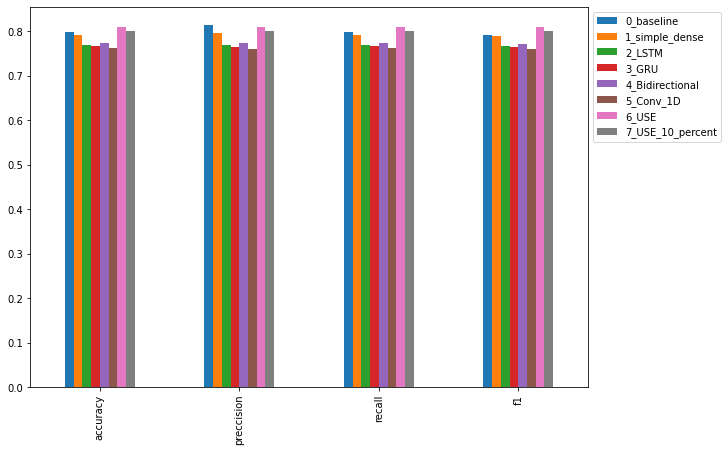

In [ ]:
# plot and compare
all_model_results.plot(kind = 'bar',
                       figsize = (10, 7)).legend(bbox_to_anchor = (1.0, 1.0));

In [ ]:
# sort model results by f1-score
all_model_results.sort_values(by = "f1", ascending =False)#['f1'].plot(kind = 'bar', figsize = (10, 7));

KeyError: ignored

# Uploading our model training logs to TensorBoard.dvd

In [ ]:
!tensorboard dev upload --logdir ./model_logs/ \
--name "NLP Modeling Experiments ZTM TF Course Notebook" \
--description "Comparing multiple different types of model architectures on the Kaggle tweets text classification dataset" \
--one_shot 

In [ ]:
#If you need to delete an experiment from tensorboard you can do the following
!tensorboard dev list

In [ ]:
#!tensorboard dev delete --experiment_id GR079EunTEGcN9PvjATQug

# Save and load our model

There are 2 main formats to save a model to in TensorFlow:
1. The HDF5 format
2. The `SavedModel` format (this is the default when using TensorFlow)




In [ ]:
model_6_results

{'accuracy': 0.81, 'f1': 0.81, 'preccision': 0.81, 'recall': 0.81}

In [ ]:
# Save TF Hub Encoder model to hdf5 format
model_6.save('model_6.h5')

In [ ]:
# load it back in with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model('model_6.h5',
                                            custom_objects = {"KerasLayer": hub.KerasLayer})


In [ ]:
# How does our loaded model perform 
loaded_model_6.evaluate(val_sentences, val_labels)

48/48 [==============================] - 4s 21ms/step - loss: 0.4358 - accuracy: 0.8102


[0.43578553199768066, 0.8102429509162903]

In [ ]:
model_6_results

{'accuracy': 0.81, 'f1': 0.81, 'preccision': 0.81, 'recall': 0.81}

Now lets save to the `SavedModel` format

In [ ]:
# save tf hub sentence encoder model format (default)
model_6.save('model_6_SavedModel_format')

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


In [ ]:
# Load model in from saved model format
loaded_model_6_SavedModel_format = tf.keras.models.load_model('model_6_SavedModel_format')

In [ ]:
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

48/48 [==============================] - 2s 17ms/step - loss: 0.4358 - accuracy: 0.8102


[0.43578553199768066, 0.8102429509162903]

## Finding the most wrong examples

In [ ]:
# Download pretrained model to ensure same results 
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
unzip_data('08_model_6_USE_feature_extractor.zip')

--2022-08-09 16:20:49--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.128, 108.177.13.128, 74.125.26.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  37.2MB/s    in 20s     

2022-08-09 16:21:09 (46.7 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [ ]:
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

48/48 [==============================] - 2s 12ms/step - loss: 0.4099 - accuracy: 0.8201


[0.4099445044994354, 0.8200919032096863]

In [ ]:
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs)) 
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create dataframe with validation sentences, validation labels and best performing model predictions  and model labels
val_df = pd.DataFrame({"text": val_sentences,
                       'target': val_labels,
                       'pred': model_6_pretrained_preds,
                       'pred_prob': tf.squeeze(model_6_pretrained_pred_probs)})


val_df

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808
...,...,...,...,...
1518,@SidelineSavage what like a pipe made of peanu...,0,0.0,0.114509
1519,Avalanche City - Sunset http://t.co/48h3tLvLXr...,1,0.0,0.287812
1520,The Whirlwind! Scourge of Europe! RT @whedones...,0,0.0,0.249553
1521,ENGLAND EAST COAST. Dogger Bank Westward. 1. S...,0,0.0,0.432494


In [ ]:
# Find the wrong predictions and sort by prediction probabilites
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob', ascending = False)
most_wrong[:10]

,text,target,pred,pred_prob
881,@adorableappple No reported flooding po in the...,0,1.0,0.970023
1307,We should all have a fire safety plan. RT @Mat...,0,1.0,0.939019
846,Mourning notices for stabbing arson victims st...,0,1.0,0.938105
1502,Two Jewish Terrorists Charged In Historic-Chur...,0,1.0,0.918810
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
814,the MOFO in DC will leave our military unarmed...,0,1.0,0.868825
1363,Governor weighs parole for California school b...,0,1.0,0.856527
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
769,Weapons stolen from National Guard Armory in N...,0,1.0,0.839689


In [ ]:
most_wrong.tail()

,text,target,pred,pred_prob
233,I get to smoke my shit in peace,1,0.0,0.042087
935,'I did another one I did another one. You stil...,1,0.0,0.041997
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [ ]:
# Check the false positives
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target : {target}, Pred {pred}, Prob {pred_prob}")
  print(f"Text:\n{text}\n")
  print(f"----\n")

Target : 0, Pred 1.0, Prob 0.9700231552124023
Text:
@adorableappple No reported flooding po in the area. Ten-4. #mmda

----

Target : 0, Pred 1.0, Prob 0.9390192627906799
Text:
We should all have a fire safety plan. RT @Matt_Kroschel: MOCK WILDFIRE near #Vail as agencies prepare for the worst. http://t.co/SWwyLRk0fv

----

Target : 0, Pred 1.0, Prob 0.9381048679351807
Text:
Mourning notices for stabbing arson victims stir Û÷politics of griefÛª in Israel: Posters for Shira Banki and A... http://t.co/3GZ5zQQTHe

----

Target : 0, Pred 1.0, Prob 0.9188095331192017
Text:
Two Jewish Terrorists Charged In Historic-Church Arson | The Ugly Truth http://t.co/iEksNFSbY7 http://t.co/VWCf3slkrW

----

Target : 0, Pred 1.0, Prob 0.9101957082748413
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target : 0, Pred 1.0, Prob 0.8769820928573608
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target

In [ ]:
# Check the false negatives
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target : {target}, Pred {pred}, Prob {pred_prob}")
  print(f"Text:\n{text}\n")
  print(f"----\n")

Target : 1, Pred 0.0, Prob 0.05507582426071167
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target : 1, Pred 0.0, Prob 0.054603368043899536
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target : 1, Pred 0.0, Prob 0.05459702014923096
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target : 1, Pred 0.0, Prob 0.049637287855148315
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target : 1, Pred 0.0, Prob 0.043918460607528687
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target : 1, Pred 0.0, Prob 0.04208683967590332
Text:
I get to smoke my shit in peace

----

Target : 1, Pred 0.0, Prob 0.04199698567390442
Te

In [ ]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
# making predictions on the test dataset and visualizing them
test_sentences =test_df['text'].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples: 
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print('-----\n')

Pred: 0, Prob: 0.24930280447006226
Text:
Remove the http://t.co/Ytao0lT144 and Linkury Browser Hijacker http://t.co/uxEKjeuIVp http://t.co/abvvRLFgDh

-----

Pred: 0, Prob: 0.09450802206993103
Text:
My aunt just gave me this drink at the game and it's bomb???? I'll never tell what in it though shhhh??????? http://t.co/vsFS7zr1gI

-----

Pred: 0, Prob: 0.04385915398597717
Text:
Tonight It's Going To Be Mayhem @ #4PlayThursdays. Everybody Free w/ Text. 1716 I ST NW (18+) http://t.co/wDefhbkF9g

-----

Pred: 1, Prob: 0.942438006401062
Text:
Flourishing sleigh bell an toothsome transit fatality: oNrhPz http://t.co/gB4W3T7b3T

-----

Pred: 1, Prob: 0.5311443209648132
Text:
Alabama home quarantined over possible EbolaåÊcase https://t.co/jr4k7IiSbu

-----

Pred: 0, Prob: 0.4233185648918152
Text:
CLEARED:incident with injury:I-495  inner loop Exit 31 - MD 97/Georgia Ave Silver Spring

-----

Pred: 0, Prob: 0.44483232498168945
Text:
Watching Deluged by Data #doczone while on my IPad..... #CBC



# The speed / score tradeoff

In [ ]:
import time 
def pred_timer(model, samples):
  """ 
  Times how long a model takes to make predictions on samples
  """

  start_time = time.perf_counter() 
  model.predict(samples)
  end_time = time.perf_counter() 
  total_time = end_time - start_time 
  time_per_pred = total_time / len(samples)
  return total_time, time_per_pred

In [ ]:
# calculate model 6 timer 
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model= model_6_pretrained,
                                                            samples = val_sentences)
model_6_total_pred_time, model_6_time_per_pred

(0.4966865530004725, 0.0003261238036772636)

In [ ]:
# Calculate baseline model 
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.0740522250016511, 4.862260341539796e-05)

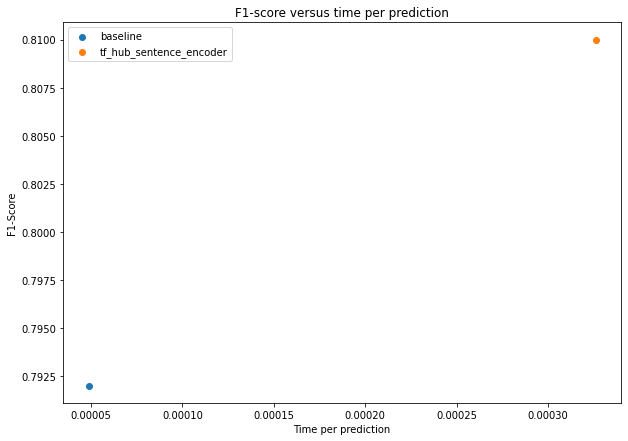

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");